# Open Data Day
## Visualización de datos abiertos con Python >> Pandas >> Dash
## Pero primero, algunas aclaraciones

<img src="imgs/python.jpg">
<img src="imgs/pandas.jpg">
<img src="imgs/plotly_dash.jpg">

## Esto no es PowerPoint ¿dónde estamos ahora?

<img src="imgs/Jupyter.jpg">

## ¿Cómo ejecutar el notebook?

En **Colab** (es necesaria una cuenta de Google):

1. Ir a la dirección https://colab.research.google.com/
2. Seleccionar la pestaña GitHub
3. Ingresa la URL correspondiente a Programming Historian >> Open Data Day: https://github.com/programminghistorian/opendataday-2021
4. Seleccionar el notebook de la ruta `python-pandas-dash/cuaderno.ipynb`
5. Para ejecutar las casillas será necesario autenticarse con una cuenta de Google.

En **binder** (es probable que se encuentren algunos bugs y se tarde un poco en cargar):

1. Ir a la dirección https://mybinder.org/
2. Escribir la dirección del repositorio https://github.com/programminghistorian/opendataday-2021 en la casilla "GitHub repository name or URL"
3. Ejecutar en el botón `launch`
4. Abrir el directorio `python-pandas-dash`
5. Abrir el archivo `cuaderno.ipynb`



# ¡Basta de preliminares! ¡A la data!
## >> ¿Open Data what?

<img src="imgs/datos-abiertos-1.png">

* Principio del gobierno digital y abierto
* Datos disponibles para todos los ciudadanos y ciudadanas
* Datos oficiales, confiables y verificables de instituciones públicas

### >> La información no está estructurada tal como la quisieramos tener.

* No todos los datos están estructurados.
* Abiertos no siempre se entienden como analizables.
* En ocasiones, datos abiertos se entiendes como informes abiertos. 

## Escoger una fuente de datos

<img src="imgs/tipos_de_archivo.jpg">

"Icons made by Freepik, Smashicons, and Smartline from [www.flaticon.com]"


## ¿Qué datos usaremos para este ejercicio?

Vamos a tomar una tabla estadística de la educación preescolar, básica y media por departamento en Colombia. Esta información la obtenemos de la siguiente dirección: https://www.datos.gov.co/Educaci-n/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR-B-SICA/ji8i-4anb

La descripción de este conjunto de datos es la siguiente:

> El conjunto de datos contiene los principales indicadores de los niveles preescolar, básica y media discriminados por Departamento desde el año 2011 hasta 2019 definitiva oficial.

> Este conjunto de datos se puede relacionar con el de matrícula en educación preescolar, básica y media donde se presenta la caracterización de los estudiantes que permiten obtener información para comprender el comportamiento de los indicadores

En primer lugar, vamos a incluir en una *variable* la ruta a los datos:

In [41]:
url = 'https://www.datos.gov.co/api/views/ji8i-4anb/rows.csv'

print(url)

https://www.datos.gov.co/api/views/ji8i-4anb/rows.csv


### ¿Qué hicimos en este paso?

Simplemente *declaramos* la dirección url en la que se encuentra el archivo csv (no la página web ¡muy importante!). 

En este caso no hemos descargado el objeto (el archivo `csv`), solamente escribimos la dirección de su ubicación.

# Preparemos el terreno para realizar nuestras actividades

Necesitaremos asegurarnos de tener instalados en nuestros ambientes algunas *librerías* que nos ayudarán a procesar los datos:

Pandas: importa los datos y permite procesarlos fácilmente.
Plotly: una librería para visualizar datos de manera interactiva y agradable.

También instalaremos `jupyter-dash`, una librería que nos permitirá visualizar los datos directamente en nuestro Notebook. 

La velocidad de instalación de los paquetes depende del entorno desde el cual se esté ejecutando; en particular, la librería `jupyter-dash` es la más pesada. 

In [1]:
!pip install pandas
!pip install plotly
!pip install jupyter-dash

# ¿Cómo importar datos para ser procesados?

## La forma relativamente fácil

Con las librerías nativas de python `csv` y `urllib.request`


In [57]:
import urllib.request as ur
import csv

r = ur.urlopen(url)
lineas = [l.decode('utf-8') for l in r.readlines()]

archivo_csv = csv.reader(lineas)

for r in archivo_csv:
    print(r)

9.27', '99.81', '93.11', '106.13', '101.18', '85.05', '', '', '1.55', '2.24', '1.49', '1.65', '1.09', '93.57', '95.84', '94.11', '91.75', '95.45', '4.88', '1.92', '4.4', '6.6', '3.46', '0.74', '0.79', '0.78', '0.85', '0.27']
['2018', '11', 'Bogotá, D.C.', '1179282', '78.71', '96.51', '70.65', '97.81', '85.97', '56.01', '105.2', '90.75', '110.39', '108.9', '93.18', '', '', '1.65', '1.9', '1.35', '2.01', '1.53', '98.02', '98.1', '98.65', '97.92', '96.32', '0.33', '0', '0.01', '0.07', '2.15', '0.33', '0.02', '0.24', '0.57', '0.21']
['2018', '13', 'Bolívar', '455784', '92.71', '98.6', '69.74', '97.25', '79.38', '44.17', '112.48', '113.41', '124.42', '112.82', '82.2', '', '', '2.75', '3.65', '2.35', '3.19', '2.4', '90.31', '95.5', '91.26', '87.38', '91.04', '6.93', '0.86', '6.39', '9.43', '6.56', '3.82', '3.25', '3.88', '4.43', '2.05']
['2018', '15', 'Boyacá', '234116', '83.54', '96.54', '70.66', '92.85', '89.25', '57.96', '106.84', '93.36', '106.31', '115.66', '97.02', '', '', '2.07', '1.8

## La manera extremadamente fácil

Con `pandas`

In [42]:
import pandas as pd

df = pd.read_csv(url)
df.head()

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2015,5,Antioquia,1262800,89.92,89.79,61.07,89.02,74.17,42.61,...,6.84,0.20,5.44,10.56,5.64,2.83,0.17,2.26,4.55,1.95
1,2015,8,Atlántico,520783,86.17,85.92,53.52,82.12,74.28,45.61,...,3.42,1.06,2.90,4.96,2.22,1.69,1.20,1.38,2.42,1.06
2,2015,11,"Bogotá, D.C.",1455309,82.20,81.77,59.17,78.94,74.89,50.61,...,0.09,0.00,0.03,0.12,0.23,9.91,1.05,6.49,16.02,7.94
3,2015,13,Bolívar,488886,88.78,88.69,58.50,87.33,71.05,39.34,...,5.49,0.78,4.61,8.15,4.97,1.83,0.99,1.74,2.46,0.92
4,2015,15,Boyacá,284611,83.62,83.57,63.02,80.65,74.22,48.61,...,4.51,0.29,2.97,7.09,4.29,2.27,0.37,1.46,3.68,2.07


## Ahora, conozcamos un poco sobre cómo están estructurados nuestros datos

### DataFrame

Al recuperar los datos, `pandas` transforma la información en un tipo de objeto llamado `DataFrame`, que es básicamente una matriz de datos en la que cada fila corresponde a un objeto y cada columna a una variable.

Los DataFrames pueden ser modificados de manera dinámica, pero se deben seguir ciertas reglas para evitar que la información se elimine o cambie de forma indeseada.

Podemos comprobar que nuestro archivo `csv` ahora es un DataFrame si imprimimos el tipo de la variable `df`:

In [43]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>




### Tamaño

* ¿Cuántas filas y columnas tiene esta tabla?

Para saberlo, utilizaremos la función `shape` de pandas.

In [44]:
tamagno = df.shape
num_filas = tamagno[0]
num_columns = tamagno[1]

print(tamagno)
print("Esta tabla tiene {} filas y {} columnas".format(num_filas, num_columns))

(297, 37)
Esta tabla tiene 297 filas y 37 columnas


^ la función `shape` regresa un tipo de archivo llamado *tuple* o *tupla*, que consiste en una lista ordenada de objetos. Podemos comprobarlo simplemente imprimiendo el tipo de dato:

In [45]:
print(type(tamagno))

<class 'tuple'>


### ¿Cuáles columnas tenemos en nuestro DataFrame?

Para saber el nombre de cada columna (y poder hacer búsquedas posteriormente) podemos utilizar la función `columns` de pandas:

In [46]:
df.columns

Index(['AÑO', 'CÓDIGO_DEPARTAMENTO', 'DEPARTAMENTO', 'POBLACIÓN_5_16',
       'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA',
       'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
       'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA',
       'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
       'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
       'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
       'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA',
       'DESERCIÓN_MEDIA', 'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN',
       'APROBACIÓN_PRIMARIA', 'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA',
       'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
      dtype='object')

### ¿Qué datos tenemos en el DataFrame?

Ahora sabemos el tamaño del DataFrame y el nombre de sus columnas. Pero, para hacer operaciones (como sumar, restar, hallar medias, etc.) tendremos que identificar cuáles son los tipos de datos que tenemos en nuestro DataFrame.

Para ello, usaremos la función `dtypes` de pandas:

In [47]:
df.dtypes

AÑO                              int64
CÓDIGO_DEPARTAMENTO              int64
DEPARTAMENTO                    object
POBLACIÓN_5_16                   int64
TASA_MATRICULACIÓN_5_16        float64
COBERTURA_NETA                 float64
COBERTURA_NETA_TRANSICIÓN      float64
COBERTURA_NETA_PRIMARIA        float64
COBERTURA_NETA_SECUNDARIA      float64
COBERTURA_NETA_MEDIA           float64
COBERTURA_BRUTA                float64
COBERTURA_BRUTA_TRANSICIÓN     float64
COBERTURA_BRUTA_PRIMARIA       float64
COBERTURA_BRUTA_SECUNDARIA     float64
COBERTURA_BRUTA_MEDIA          float64
TAMAÑO_PROMEDIO_DE_GRUPO       float64
SEDES_CONECTADAS_A_INTERNET    float64
DESERCIÓN                      float64
DESERCIÓN_TRANSICIÓN           float64
DESERCIÓN_PRIMARIA             float64
DESERCIÓN_SECUNDARIA           float64
DESERCIÓN_MEDIA                float64
APROBACIÓN                     float64
APROBACIÓN_TRANSICIÓN          float64
APROBACIÓN_PRIMARIA            float64
APROBACIÓN_SECUNDARIA    

^ Analiza los tipos de datos que tenemos en el DataFrame:

* int64 = números enteros
* float64 = números decimales
* object = objeto de pandas (puede ser un diccionario, un numpy.array, una lista...)



Pandas incluso nos permite hacer análisis muy rápidos de la información, como por ejemplo, hallar la desviación estándar de cada columna (en la que existan datos de intervalo):

In [48]:
df.std()

AÑO                                 2.586347
CÓDIGO_DEPARTAMENTO                30.842680
POBLACIÓN_5_16                 321633.980805
TASA_MATRICULACIÓN_5_16            10.400751
COBERTURA_NETA                     10.594862
COBERTURA_NETA_TRANSICIÓN          11.724230
COBERTURA_NETA_PRIMARIA            10.325933
COBERTURA_NETA_SECUNDARIA          15.132029
COBERTURA_NETA_MEDIA               11.949322
COBERTURA_BRUTA                    11.723088
COBERTURA_BRUTA_TRANSICIÓN         18.483062
COBERTURA_BRUTA_PRIMARIA           13.710477
COBERTURA_BRUTA_SECUNDARIA         15.817311
COBERTURA_BRUTA_MEDIA              15.932259
TAMAÑO_PROMEDIO_DE_GRUPO        11036.631798
SEDES_CONECTADAS_A_INTERNET        21.374901
DESERCIÓN                           1.779751
DESERCIÓN_TRANSICIÓN                2.291431
DESERCIÓN_PRIMARIA                  1.707050
DESERCIÓN_SECUNDARIA                2.271398
DESERCIÓN_MEDIA                     1.897188
APROBACIÓN                          4.695929
APROBACIÓN

# Manipular la información del DataFrame

## ¿Qué información hay en una columna específica?

Para ver qué información tiene una columna específica vamos a utilizar el siguiente método:

In [49]:
col_nombre = df['DEPARTAMENTO']

col_nombre[:10]

0       Antioquia
1       Atlántico
2    Bogotá, D.C.
3         Bolívar
4          Boyacá
5          Caldas
6         Caquetá
7           Cauca
8           Cesar
9         Córdoba
Name: DEPARTAMENTO, dtype: object

^ ¿Qué información regresa este método?

Intenta con otras columnas y revisa qué información podemos obtener.

In [12]:
# Escribe aquí tu código >>



## ¿Cómo podemos acceder a información de las filas?

### El método `iloc`

Con este método podemos acceder a una fila o serie de filas de acuerdo con su índice (0 >> n)

Por ejemplo:

In [50]:
# Acceder a la fila con índice = 5
lista_segmentada = df.iloc[5]
lista_segmentada

AÑO                              2015
CÓDIGO_DEPARTAMENTO                17
DEPARTAMENTO                   Caldas
POBLACIÓN_5_16                 194108
TASA_MATRICULACIÓN_5_16          78.9
COBERTURA_NETA                  78.86
COBERTURA_NETA_TRANSICIÓN       52.47
COBERTURA_NETA_PRIMARIA         74.53
COBERTURA_NETA_SECUNDARIA       69.24
COBERTURA_NETA_MEDIA            43.55
COBERTURA_BRUTA                 90.19
COBERTURA_BRUTA_TRANSICIÓN      68.31
COBERTURA_BRUTA_PRIMARIA        91.54
COBERTURA_BRUTA_SECUNDARIA      97.76
COBERTURA_BRUTA_MEDIA           82.41
TAMAÑO_PROMEDIO_DE_GRUPO        25.44
SEDES_CONECTADAS_A_INTERNET     30.69
DESERCIÓN                        3.67
DESERCIÓN_TRANSICIÓN             3.66
DESERCIÓN_PRIMARIA                2.7
DESERCIÓN_SECUNDARIA             5.07
DESERCIÓN_MEDIA                   3.1
APROBACIÓN                      88.13
APROBACIÓN_TRANSICIÓN           95.55
APROBACIÓN_PRIMARIA             90.65
APROBACIÓN_SECUNDARIA           82.79
APROBACIÓN_M

In [51]:
# Acceder a las filas 10 a 20

lista_segmentada = df.iloc[10:20]
lista_segmentada

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
10,2015,25,Cundinamarca,576429,90.72,90.47,55.93,86.83,80.91,50.50,...,3.52,0.43,2.19,5.80,3.30,2.14,0.48,1.67,3.26,1.44
11,2015,27,Chocó,145625,80.48,80.48,51.99,82.20,47.30,20.35,...,6.87,0.34,8.15,7.41,2.91,0.29,0.24,0.30,0.34,0.12
12,2015,41,Huila,269323,87.64,87.58,58.00,87.77,74.81,40.15,...,7.79,0.34,5.84,12.09,7.67,1.09,0.19,0.80,1.78,0.87
13,2015,44,La Guajira,258207,74.12,74.08,47.17,71.58,44.62,19.80,...,1.88,0.40,1.93,2.52,1.30,1.42,1.70,1.29,1.84,0.64
14,2015,47,Magdalena,330539,93.61,93.43,64.05,87.30,69.06,35.65,...,2.78,1.28,2.58,3.72,2.32,1.07,0.92,1.00,1.40,0.46
15,2015,50,Meta,217437,92.19,92.14,59.32,90.32,76.35,42.26,...,4.62,0.10,3.09,7.94,3.97,1.10,0.08,0.78,1.94,0.55
16,2015,52,Nariño,396138,73.53,73.51,39.88,71.43,56.46,29.95,...,2.35,0.03,1.77,3.39,3.28,1.35,0.34,1.04,2.27,0.95
17,2015,54,Norte de Santander,310611,85.89,85.84,58.03,89.27,68.70,36.24,...,1.59,0.15,1.07,2.55,2.11,1.31,0.35,1.08,2.00,0.85
18,2015,63,Quindio,109400,81.93,81.86,44.92,74.18,76.01,48.03,...,6.01,0.15,3.79,9.31,6.39,1.38,0.17,1.11,2.04,1.10
19,2015,66,Risaralda,183900,88.12,87.94,54.05,83.32,76.60,43.22,...,5.92,1.38,3.84,9.64,5.18,1.52,0.15,1.28,2.36,0.73


^ ¿Qué información regresa este método? 

Pruébalo por tí mismo:

In [ ]:
# Escribe aquí tu código

### El método `loc`

Este método es bastante útil para encontrar coincidencias en una serie. Es similar al query en SQL ```SELECT * FROM `tabla` WHERE `columna` = 'clave'```

Se escribe de la siguiente manera:


In [52]:
busqueda = df.loc[df['DEPARTAMENTO'] == "Santander"]
busqueda


,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
20,2015,68,Santander,407815,94.50,94.37,59.90,94.34,82.45,47.84,...,4.90,0.81,2.93,8.18,5.13,1.62,0.32,1.12,2.64,1.31
53,2014,68,Santander,413227,93.63,93.52,57.10,93.33,81.72,47.00,...,1.73,0.49,0.98,2.80,2.27,1.76,0.28,1.36,2.80,1.36
86,2013,68,Santander,419596,93.40,93.28,60.45,92.92,80.27,48.09,...,3.41,0.47,2.00,5.58,4.41,2.04,0.87,1.48,3.29,1.35
119,2012,68,Santander,425904,92.21,92.11,70.17,92.89,77.82,46.84,...,2.68,0.32,1.64,4.44,3.23,2.53,1.00,1.75,4.18,1.58
152,2011,68,Santander,434034,92.49,92.40,69.70,92.88,77.28,48.10,...,2.07,0.34,1.02,3.48,2.98,2.92,1.36,2.30,4.48,1.59
185,2016,68,Santander,402820,95.20,95.00,59.67,94.75,83.00,50.45,...,6.14,0.52,3.85,10.22,6.15,2.48,0.90,1.96,3.90,1.27
218,2017,68,Santander,398621,96.50,96.33,63.75,95.04,85.29,51.23,...,6.07,0.46,4.06,9.87,5.88,2.41,0.71,1.92,3.75,1.34
251,2018,68,Santander,401463,97.79,96.06,67.51,94.88,83.83,49.63,...,7.34,0.45,4.44,12.29,7.35,1.73,0.47,1.43,2.71,0.71
284,2019,68,Santander,405798,96.38,96.20,67.64,94.58,84.70,49.96,...,7.47,0.46,4.56,12.42,7.26,1.91,0.44,1.49,2.96,1.17


¿Y si queremos ver por departamento y año?

Utilizamos el mismo método (`loc`) pero ahora buscamos dos valores. Si lo verbalizamos es como pedirle a la máquina:

Búscame en el DataFrame todos los valores en los que el departamento sea 'Santander' y el año sea igual a 2019. Recordemos que la columna 'AÑO' está compuesta por datos en `int64`, así que tendremos que escribir el año **sin comillas**.

En código será el siguiente:

In [56]:
agno_loc = df.loc[(df['DEPARTAMENTO'] == 'Santander') & (df['AÑO'] == 2019)]
agno_loc

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
284,2019,68,Santander,405798,96.38,96.2,67.64,94.58,84.7,49.96,...,7.47,0.46,4.56,12.42,7.26,1.91,0.44,1.49,2.96,1.17


Ahora, intenta regresar los valores correspondientes a un año completo:

In [ ]:
# Escribe aquí tu código:



# ¡A visualizar!

Con estos datos, podemos hacer nuestra primera visualización. Por ejemplo, ver la tasa de matriculación por año en un departamento específico. 

La manera más sencilla de hacerlo es utilizando la librería `Matplotlib` que se instala al mismo tiempo que `pandas`. Para hacer la gráfica, primero tenemos que definir nuestro DataFrame:

In [59]:
bogota = df.loc[df['DEPARTAMENTO'] == 'Bogotá, D.C.']
bogota

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
2,2015,11,"Bogotá, D.C.",1455309,82.20,81.77,59.17,78.94,74.89,50.61,...,0.09,0.00,0.03,0.12,0.23,9.91,1.05,6.49,16.02,7.94
35,2014,11,"Bogotá, D.C.",1460379,80.79,80.38,57.76,76.77,75.23,49.97,...,0.14,0.00,0.06,0.25,0.17,8.69,0.58,5.47,14.06,8.14
68,2013,11,"Bogotá, D.C.",1466854,84.50,84.07,61.24,79.32,79.72,52.67,...,0.00,0.01,0.00,0.00,0.00,6.89,0.91,4.88,10.78,5.54
101,2012,11,"Bogotá, D.C.",1470171,86.94,86.52,66.33,83.97,81.47,51.78,...,0.00,0.00,0.00,0.00,0.00,5.17,0.19,3.61,8.31,4.08
134,2011,11,"Bogotá, D.C.",1479334,90.70,90.29,68.63,86.99,84.70,55.01,...,0.00,0.00,0.00,0.00,0.00,3.23,0.03,2.30,5.11,2.57
233,2018,11,"Bogotá, D.C.",1179282,78.71,96.51,70.65,97.81,85.97,56.01,...,0.33,0.00,0.01,0.07,2.15,0.33,0.02,0.24,0.57,0.21
266,2019,11,"Bogotá, D.C.",1181531,96.82,96.30,69.11,96.22,87.52,55.49,...,0.90,0.03,0.53,0.98,2.34,2.62,0.08,2.26,3.98,1.44


Ahora, vamos a realizar un gráfico de barras que muestre la tasa de matriculación entre los años 2011 y 2019:

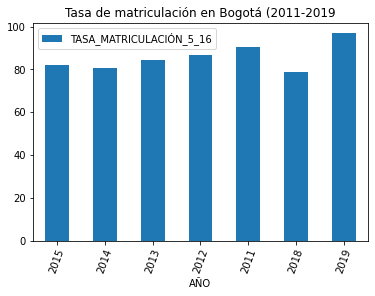

In [64]:
bogota.plot.bar(x='AÑO', y='TASA_MATRICULACIÓN_5_16', rot=70, title='Tasa de matriculación en Bogotá (2011-2019')
plot.show()

También podemos hacer una comparativa de la cobertura con una gráfica de barras agrupadas. 

En primer lugar, construyamos un DataFrame que contenga solamente los resultados que usaremos:

In [80]:
bogota_cobertura = bogota.groupby('AÑO').sum()[['COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA']]
bogota_cobertura = bogota_cobertura.sort_values('AÑO')
bogota_cobertura

,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA
AÑO,,,,
2011,68.63,86.99,84.70,55.01
2012,66.33,83.97,81.47,51.78
2013,61.24,79.32,79.72,52.67
2014,57.76,76.77,75.23,49.97
2015,59.17,78.94,74.89,50.61
2018,70.65,97.81,85.97,56.01
2019,69.11,96.22,87.52,55.49


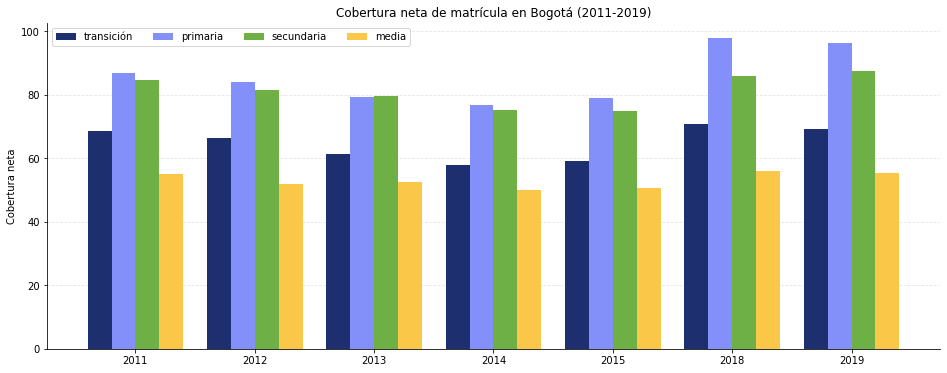

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# definimos la figura
fig, ax = plt.subplots(1, figsize=(16, 6))

# establecemos los valores del eje x
x = np.arange(0, len(bogota_cobertura.index))

# escribimos las barras
plt.bar(x - 0.3, bogota_cobertura['COBERTURA_NETA_TRANSICIÓN'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, bogota_cobertura['COBERTURA_NETA_PRIMARIA'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, bogota_cobertura['COBERTURA_NETA_SECUNDARIA'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, bogota_cobertura['COBERTURA_NETA_MEDIA'], width = 0.2, color = '#FAC748')

# eliminar líneas de la caja de la visualización
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# leyendas de los ejes x y
plt.ylabel('Cobertura neta')
plt.xticks(x, bogota_cobertura.index)

# líneas de la cuadrícula
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

# Título y leyenda
plt.title('Cobertura neta de matrícula en Bogotá (2011-2019)')
plt.legend(['transición', 'primaria', 'secundaria', 'media'], loc='upper left', ncol = 4)

plt.show()



De manera similar, podemos hacer barras horizontales y agrupadas como las siguientes:

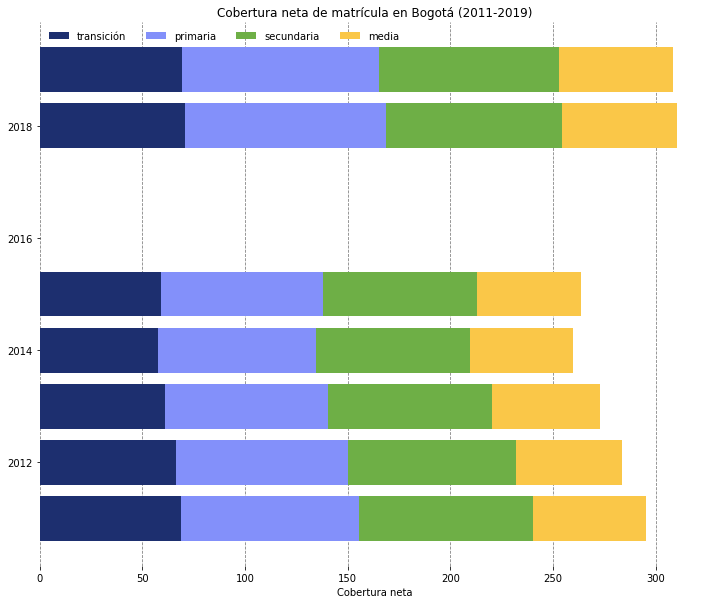

In [90]:
campos = ['COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA']
colores = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
etiquetas = ['transición', 'primaria', 'secundaria', 'media']

# Figura y ejes
fig, ax = plt.subplots(1, figsize=(12, 10))

# barras
left = len(bogota_cobertura) * [0]
for idx, name in enumerate(campos):
    plt.barh(bogota_cobertura.index, bogota_cobertura[name], left = left, color=colores[idx])
    left = left + bogota_cobertura[name]

# título, leyenda y etiquetas
plt.title('Cobertura neta de matrícula en Bogotá (2011-2019)')
plt.legend(etiquetas, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Cobertura neta')

# Remover los bordes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ajustar los límites y escribir la cuadrícula
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()


¿puedes hacer una gráfica similar con otro departamento?

In [ ]:
# Escribe aquí tu código



# ¿Cómo podemos hacer algo más complejo (de manera más sencilla)?

Con Matplotlib es posible hacer toda clase de visualizaciones ([por ejemplo](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)), pero una forma sencilla, dinámica y lista para publicar es a través de `plotly - Dash`.

In [16]:
import plotly.express as px

fig = px.scatter(df, x='POBLACIÓN_5_16', y='TASA_MATRICULACIÓN_5_16', color='DEPARTAMENTO', size='TASA_MATRICULACIÓN_5_16', hover_data=['POBLACIÓN_5_16'])




In [18]:
from jupyter_dash import JupyterDash

e:\Proyectos\ProgrammingHistorian\opendataday-2021\python-pandas-dash


In [19]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [20]:
# Necesario si corre en Binder

JupyterDash.infer_jupyter_proxy_config()

OSError: Unable to communicate with the jupyter_dash notebook or JupyterLab 
extension required to infer Jupyter configuration.

In [ ]:
# Construir la aplicación

app = JupyterDash(__name__)

server = app.server

app.layout = html.Div([
    dcc.Graph(figure=fig)
])

In [ ]:
app.run_server(mode="inline")

# Referencias

## Documentación

* [The Programming Historian: Python](https://programminghistorian.org/es/lecciones/?topic=python)
* [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
* [plotly open source graphing libraries](https://plotly.com/python/)
* [dash open-source](https://dash.plotly.com/)


## Bibliografía

* McKinney, Wes. *Python for data analysis: data wrangling with pandas, NumPy, and IPython*. Second edition, O’Reilly Media, Inc, 2018.
* Pajankar, Ashwin. *Practical Python Data Visualization: A Fast Track Approach to Learning Data Visualization with Python*. 2021.
* Stepanek, y Suresh John. *Thinking in Pandas*. Apress, 2020. Open WorldCat, https://link.springer.com/10.1007/978-1-4842-5839-2.

